# Decision Trees - Regression

- Purpose: Predict insurance charges (cost) using a Decision Tree Regressor
- Dataset: insurance.csv (Features: age, sex, bmi, children, smoker, region, charges)
- Objective: Demonstrate decision tree for regression following industry use case guidance

- Columns in the data
- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: Individual medical costs billed by health insurance

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
data = pd.read_csv('insurance.csv')
print(data.head())
print(data.info())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [5]:
# Encode categorical features; DecisionTree can handle non-scaled features, but needs numeric input.
data_encoded = pd.get_dummies(data, drop_first=True)
print(data_encoded.head())

   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


In [6]:
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
dt_reg = DecisionTreeRegressor(random_state=42, max_depth=4) # max_depth is a key hyperparameter to avoid overfitting
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

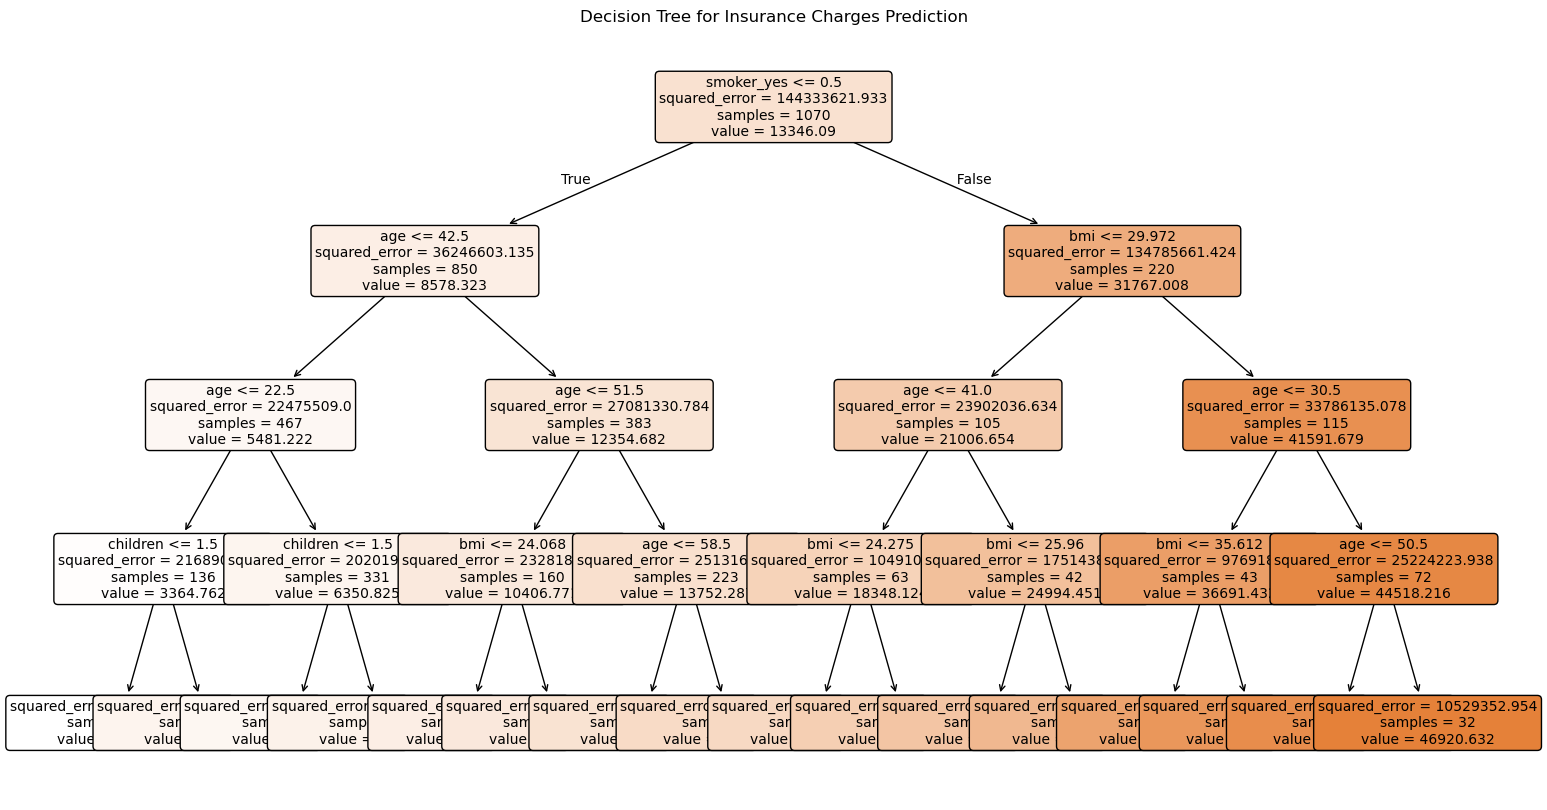

In [8]:
plt.figure(figsize=(18,10))
plot_tree(dt_reg, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree for Insurance Charges Prediction')
plt.show()

In [9]:
y_pred_train = dt_reg.predict(X_train)
y_pred_test = dt_reg.predict(X_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train MSE: {mse_train:.2f}, Train R^2: {r2_train:.3f}")
print(f"Test MSE: {mse_test:.2f}, Test R^2: {r2_test:.3f}")

Train MSE: 19440139.08, Train R^2: 0.865
Test MSE: 21093484.00, Test R^2: 0.864


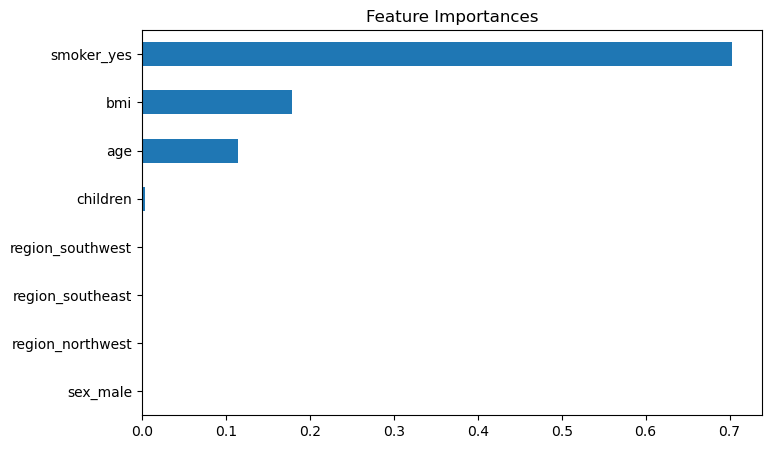

In [10]:
importances = pd.Series(dt_reg.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8,5), title='Feature Importances')
plt.show()

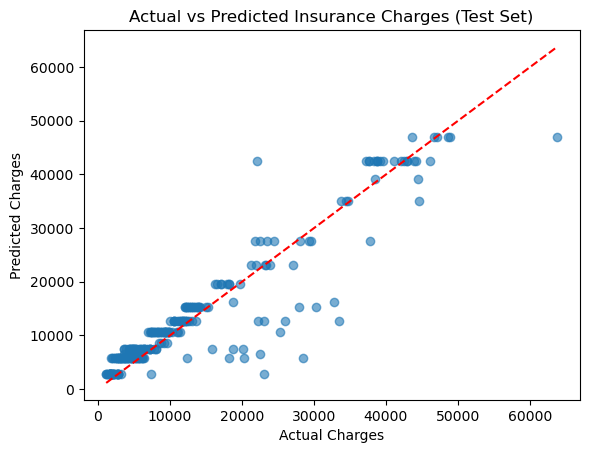

In [11]:
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Insurance Charges (Test Set)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [13]:
for depth in [2,3,4,5, None]:
    dt_temp = DecisionTreeRegressor(random_state=42, max_depth=depth)
    dt_temp.fit(X_train, y_train)
    print(f"Depth={depth}: Test R^2={r2_score(y_test, dt_temp.predict(X_test)):.3f}")
#xplain: Demonstrate how increasing tree depth affects model performance, linking to bias-

Depth=2: Test R^2=0.832
Depth=3: Test R^2=0.853
Depth=4: Test R^2=0.864
Depth=5: Test R^2=0.834
Depth=None: Test R^2=0.727


# Decision Trees - Classification

- Purpose: Predict if an employee will attrite ('Attrition': Yes/No) using a Decision Tree Classifier
- Dataset: WA_Fn-UseC_-HR-Employee-Attrition.csv
- Objective: Apply decision tree for classification with full pipeline and explanations

## Context
The key to success in any organization is attracting and retaining top talent. I’m an HR analyst at my company, and one of my tasks is to determine which factors keep employees at my company and which prompt others to leave. I need to know what factors I can change to prevent the loss of good people. Watson Analytics is going to help.


I have data about past and current employees in a spreadsheet on my desk top. It has various data points on our employees, but I’m most interested in whether they’re still with my company or whether they’ve gone to work somewhere else. And I want to understand how this relates to workforce attrition.

- Education
1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

- EnvironmentSatisfaction

1 'Low' 2 'Medium' 3 'High' 4 'Very High'

- JobInvolvement

1 'Low' 2 'Medium' 3 'High' 4 'Very High'

- JobSatisfaction

1 'Low' 2 'Medium' 3 'High' 4 'Very High'

- PerformanceRating

1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

- RelationshipSatisfaction

1 'Low' 2 'Medium' 3 'High' 4 'Very High'

- WorkLifeBalance

1 'Bad' 2 'Good' 3 'Better' 4 'Best'

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [15]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
print(data.head())
print(data.info())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [16]:
# Drop identifiers and columns that provide no predictive signal
drop_cols = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
data = data.drop(columns=drop_cols)

# Encode categorical features including target label
data_encoded = pd.get_dummies(data, drop_first=True)
print(data_encoded.head())

   Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   41       1102                 1          2                        2   
1   49        279                 8          1                        3   
2   37       1373                 2          2                        4   
3   33       1392                 3          4                        4   
4   27        591                 2          1                        1   

   HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  ...  \
0          94               3         2                4           5993  ...   
1          61               2         2                2           5130  ...   
2          92               2         1                3           2090  ...   
3          56               3         1                3           2909  ...   
4          40               3         1                2           3468  ...   

   JobRole_Laboratory Technician  JobRole_Manager  \
0              

In [17]:
X = data_encoded.drop('Attrition_Yes', axis=1)
y = data_encoded['Attrition_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [29]:
dt_clf = DecisionTreeClassifier(random_state=42, max_depth=3, criterion='gini') # max_depth for interpretability and to reduce overfitting
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

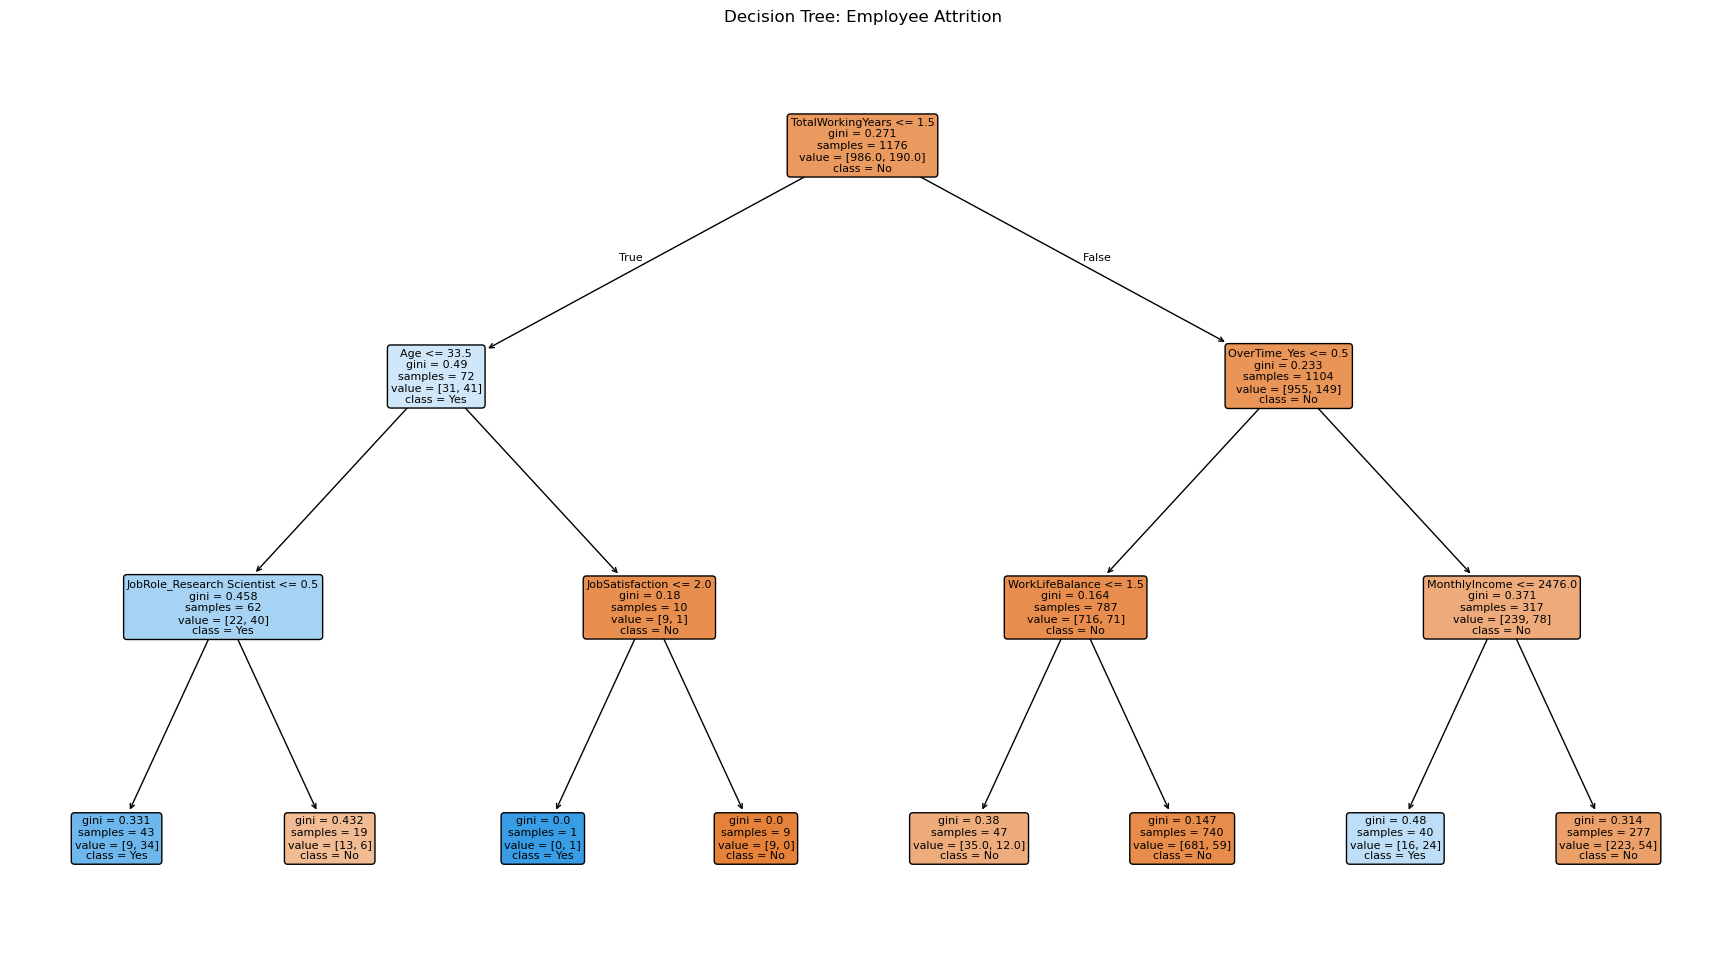

In [30]:
plt.figure(figsize=(22,12))
plot_tree(dt_clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True, fontsize=8)
plt.title('Decision Tree: Employee Attrition')
plt.show()

In [31]:
y_pred = dt_clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))
print('Test Accuracy:', accuracy_score(y_test, y_pred))

[[235  12]
 [ 37  10]]
              precision    recall  f1-score   support

          No       0.86      0.95      0.91       247
         Yes       0.45      0.21      0.29        47

    accuracy                           0.83       294
   macro avg       0.66      0.58      0.60       294
weighted avg       0.80      0.83      0.81       294

Test Accuracy: 0.8333333333333334


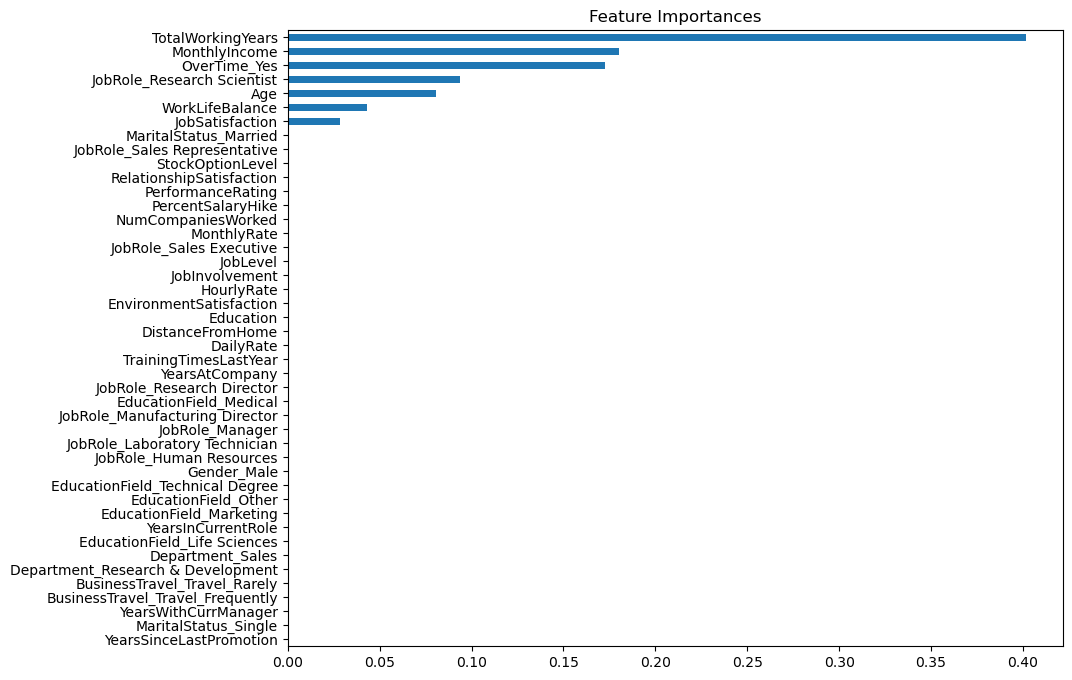

In [32]:
importances = pd.Series(dt_clf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10,8), title='Feature Importances')
plt.show()

In [23]:
pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 14.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


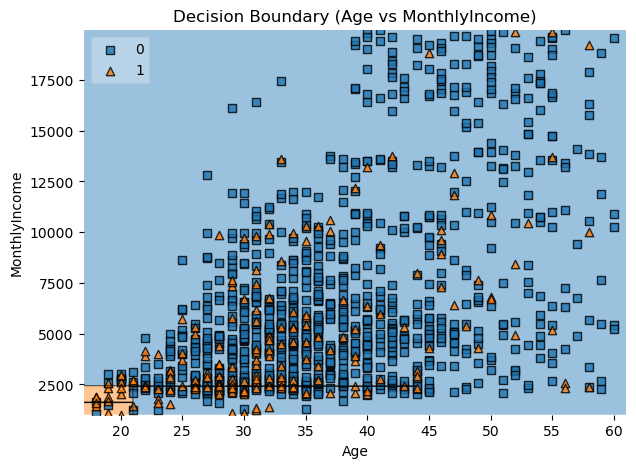

In [26]:
# Select two key features for boundary plotting (if interested in focused scenario)
# Example: Age and MonthlyIncome
from mlxtend.plotting import plot_decision_regions

selected_features = ['Age', 'MonthlyIncome']
X_small = X_train[selected_features].values
y_small = y_train.astype(np.int_).values  # Convert to integer NumPy array

dt_clf_small = DecisionTreeClassifier(random_state=42, max_depth=4)
dt_clf_small.fit(X_small, y_small)

plt.figure(figsize=(7,5))
plot_decision_regions(X_small, y_small, clf=dt_clf_small, legend=2)
plt.xlabel('Age')
plt.ylabel('MonthlyIncome')
plt.title("Decision Boundary (Age vs MonthlyIncome)")
plt.show()

In [27]:
for depth in [2, 3, 4, 5, None]:
    dt_temp = DecisionTreeClassifier(random_state=42, max_depth=depth)
    dt_temp.fit(X_train, y_train)
    pred = dt_temp.predict(X_test)
    print(f"Depth={depth}: Test Accuracy={accuracy_score(y_test, pred):.3f}")

Depth=2: Test Accuracy=0.806
Depth=3: Test Accuracy=0.833
Depth=4: Test Accuracy=0.810
Depth=5: Test Accuracy=0.833
Depth=None: Test Accuracy=0.765
